3.6.9
0.9903926402017447
0.9943137099887692
0.9959704799689548
0.9951009705560842
0.9948246896200165
0.9924669851970122
0.9953813536420373
0.9955423963560214
0.9982874158478877
0.9956818834532671
0.9929614406093452
0.9969919298430721
0.9989625830239168
0.9964188105876834
0.9964620710647681
1.846734681774966
1.6580049595987498
0.9954116268074022
1.761711229998645
1.7155858115274647


/home/jackieyao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0.9947356960455769
1.649846474516388
1.8081549176111937
0.9957541720020762
1.5517289179301563
1.8740864177949619
0.9928654664572814
1.4410535996099894
1.9504305152774857
0.9955729313748931
1.3204193667465678
2.00344139044954
0.9932245468880718
1.1951927181257342
2.0281632725570775
0.9959740997154437
1.0526248321702625
2.0393090003568943
1.0346525538632492
1.0230367012898327
2.0298393514471345
1.170482708547849
1.0132710673921625
1.9935640245958783
1.3059297116311095
1.006274915637908
1.9349798310587323
1.4282913552233005
1.003350913219615
1.878450634681026
1.5822444703603145
1.0770551202369876
1.8156093584068516
1.6504681428501498
1.0443161424726073
1.7439798043564925
1.733481257040116
1.0233580612897784
1.654150868718353
1.8092472584393438
0.9961773852964455
1.556155872500822
1.8741202936023722
1.0009781035766643
1.4465949034017622
1.9225173817239627
1.0011578231601999
1.32755109599403
1.9562240099307973
0.9986026195916176
1.1984148814108135
1.9785327855414758
1.0021757549690182
1.060

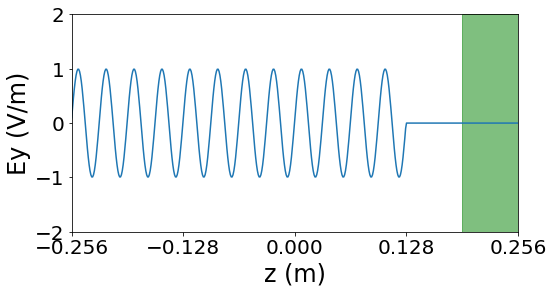

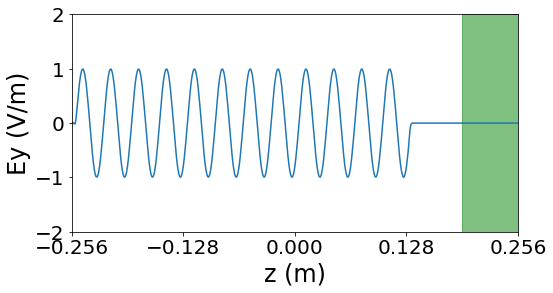

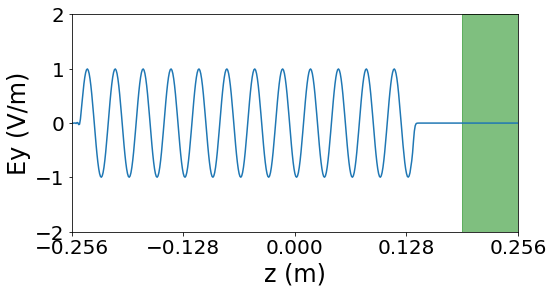

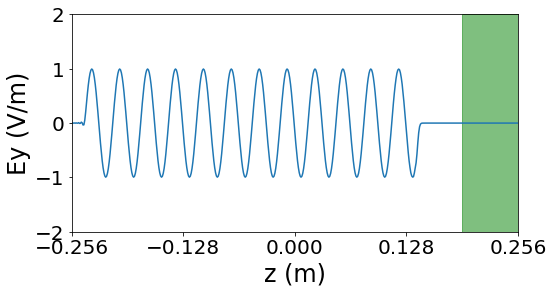

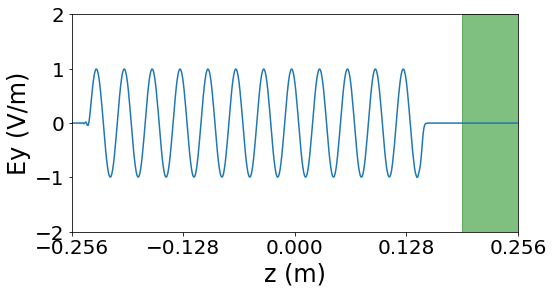

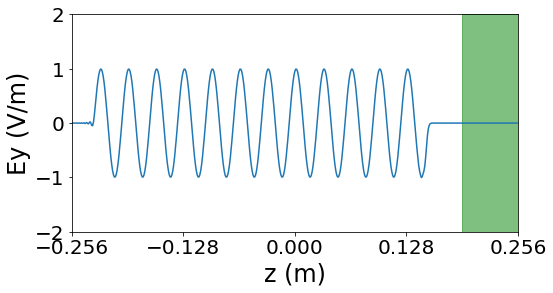

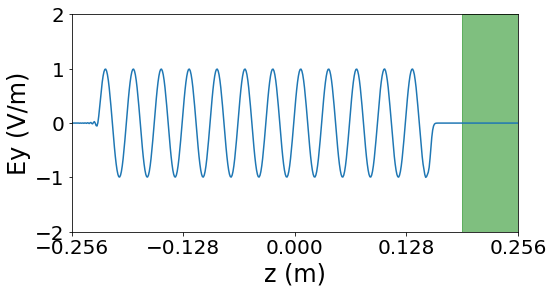

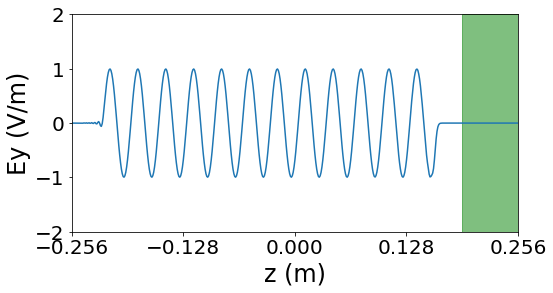

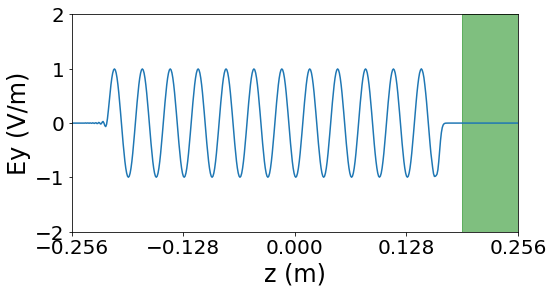

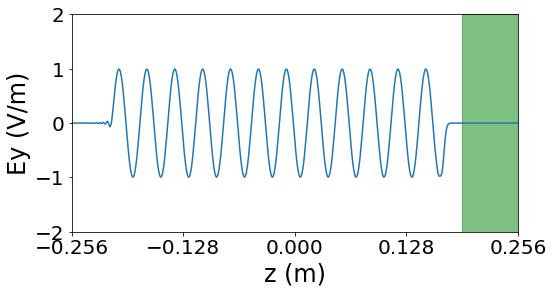

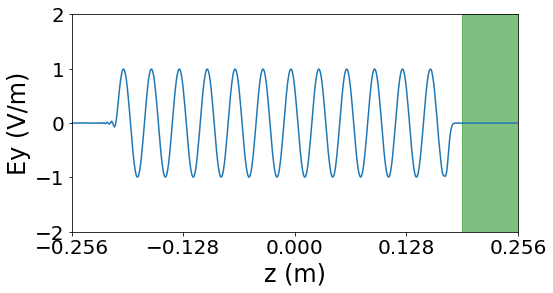

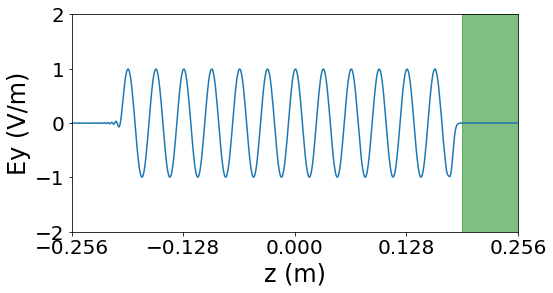

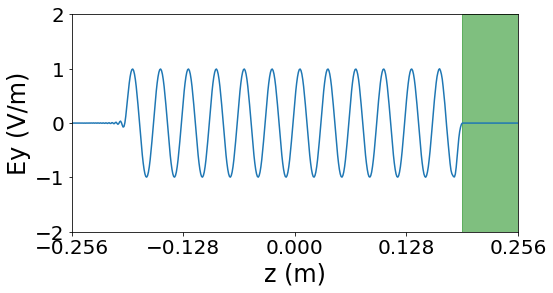

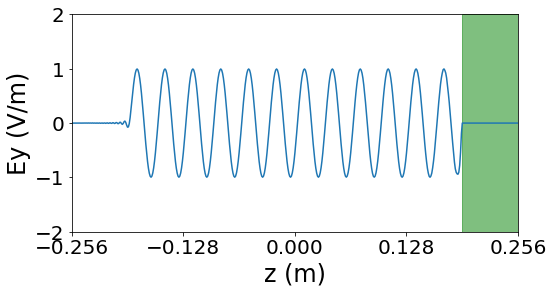

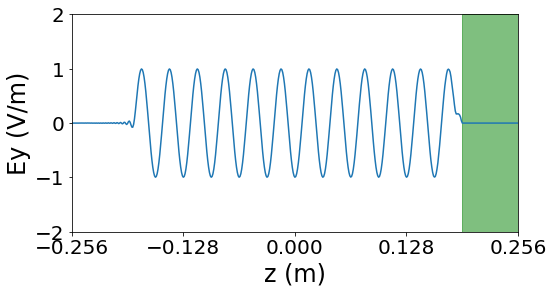

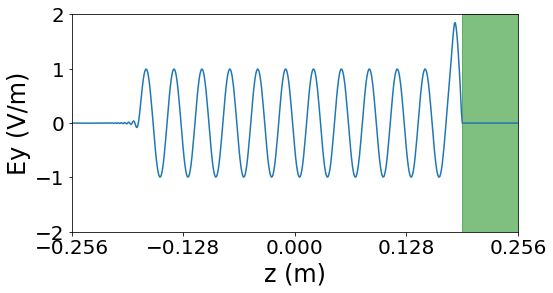

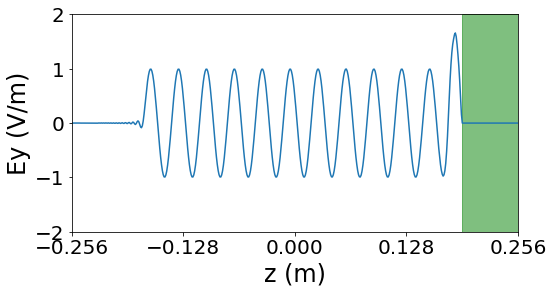

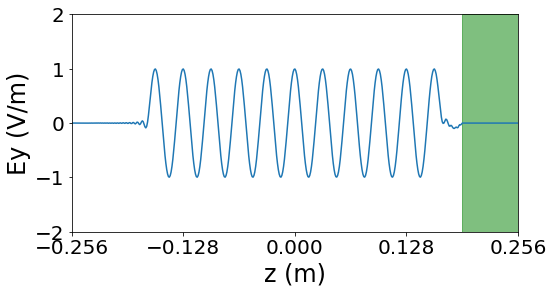

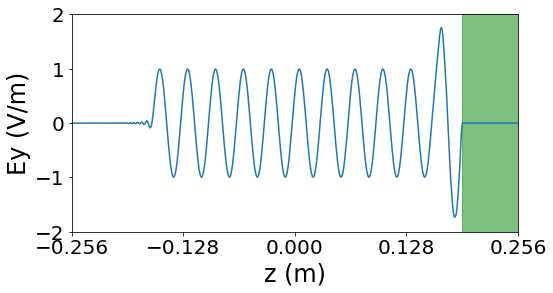

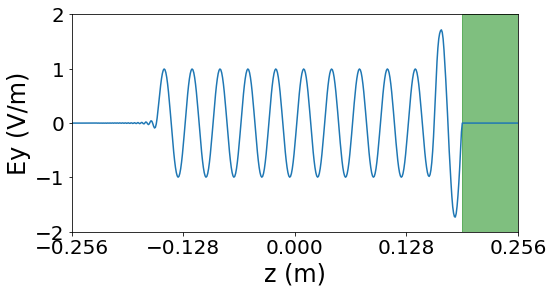

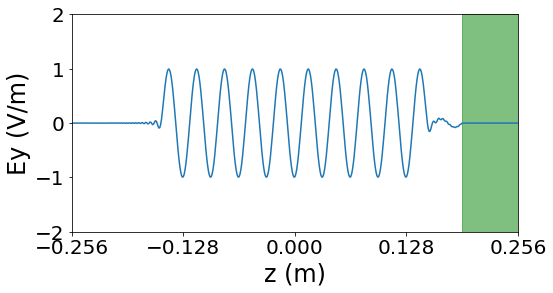

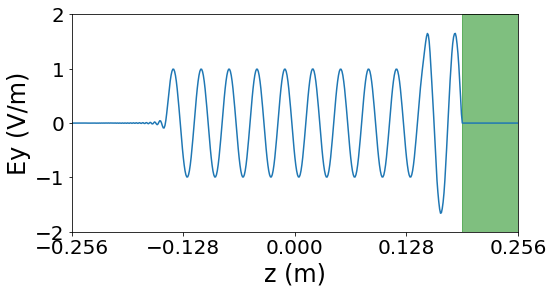

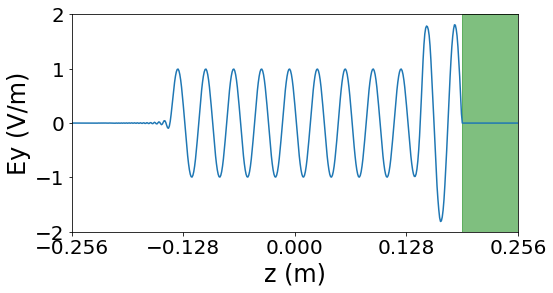

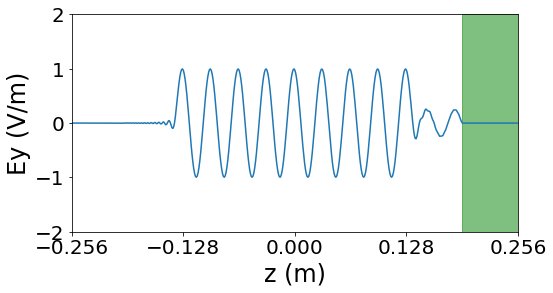

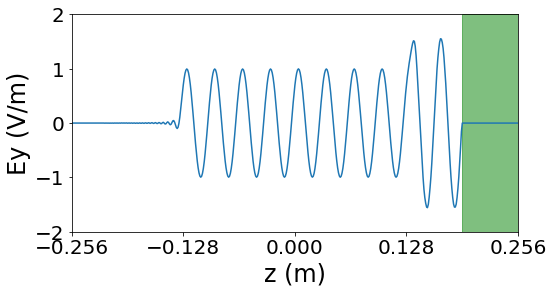

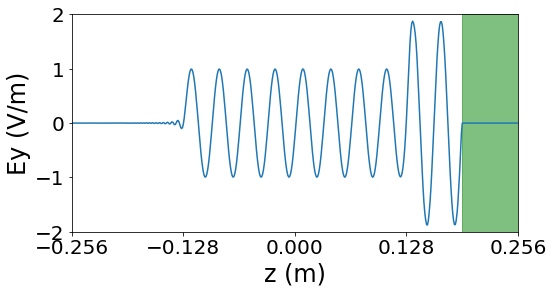

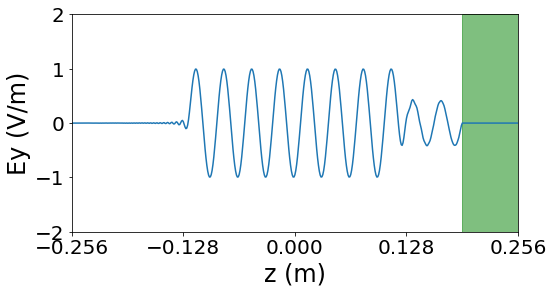

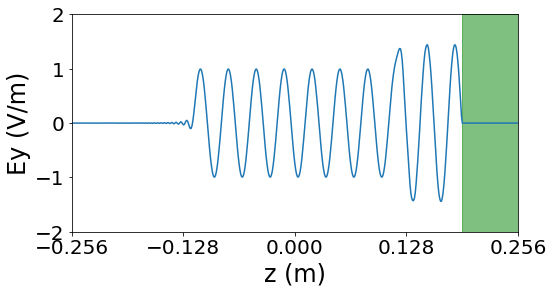

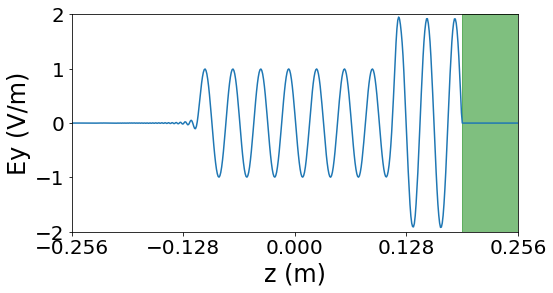

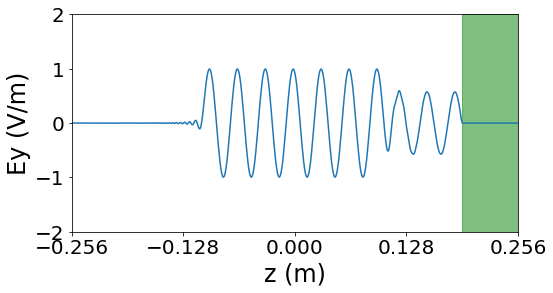

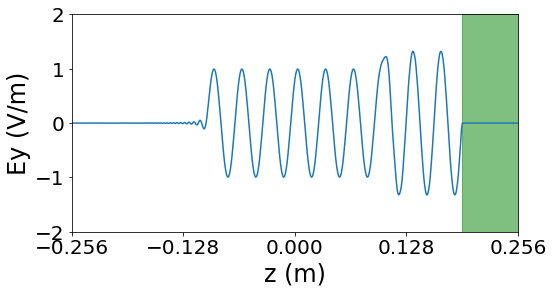

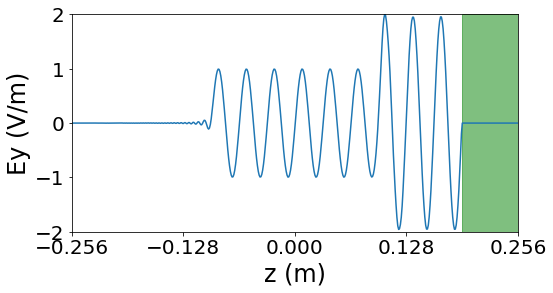

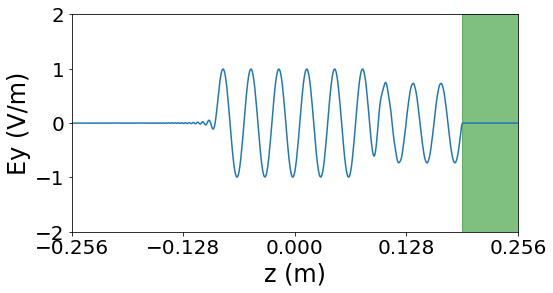

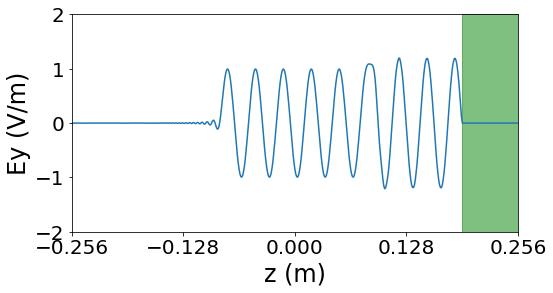

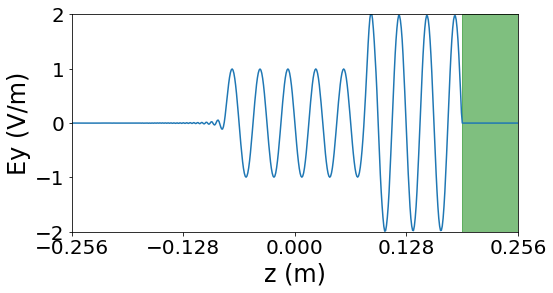

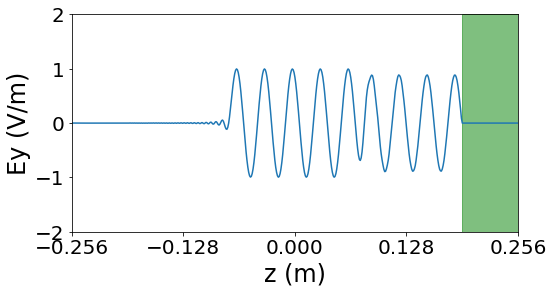

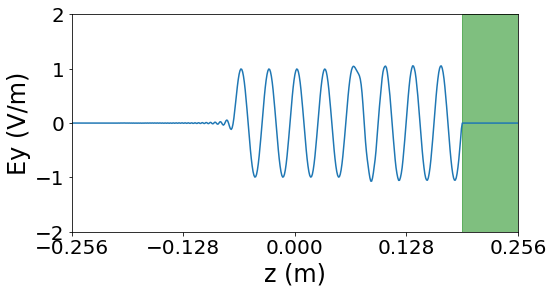

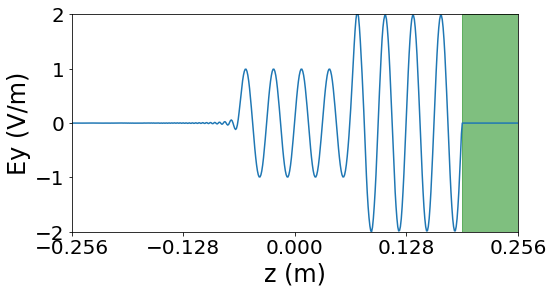

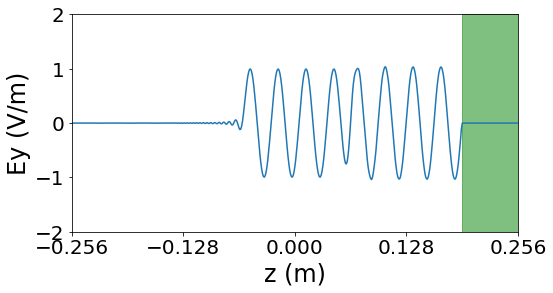

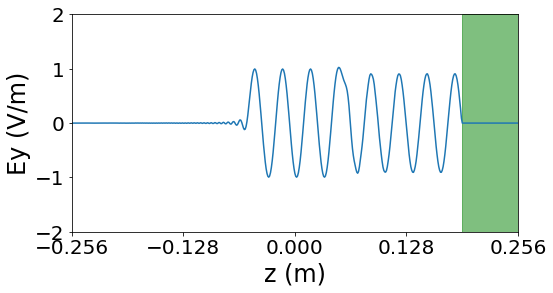

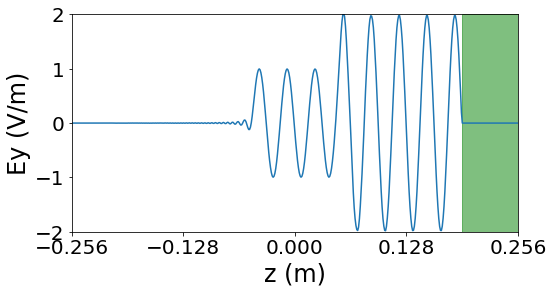

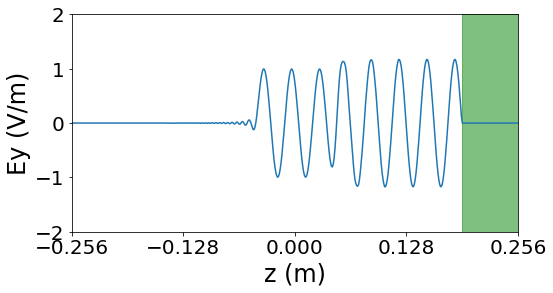

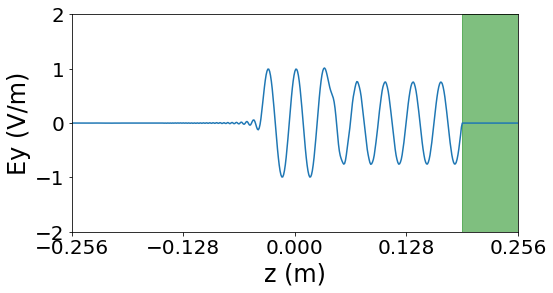

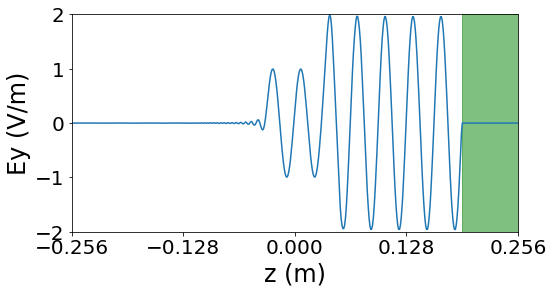

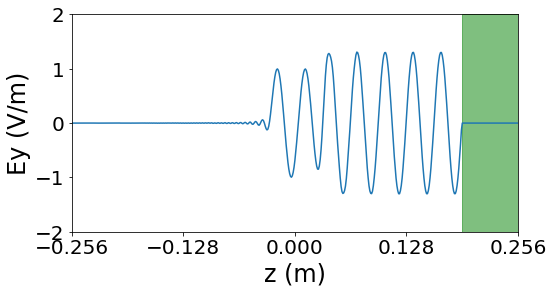

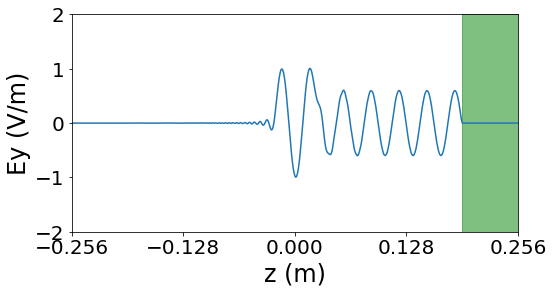

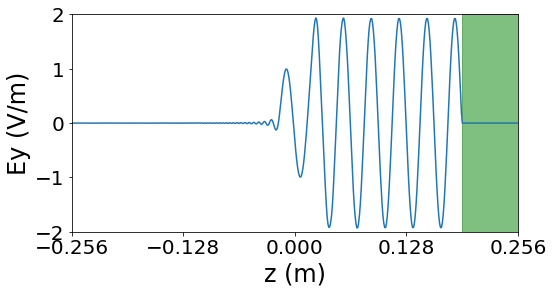

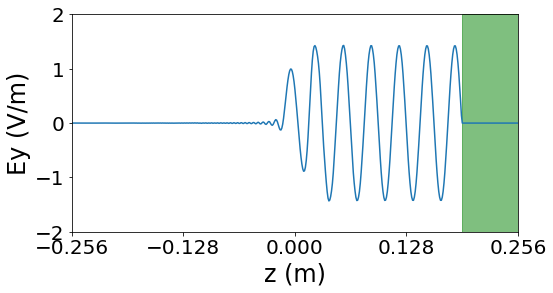

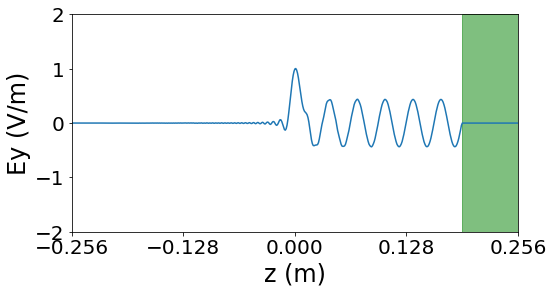

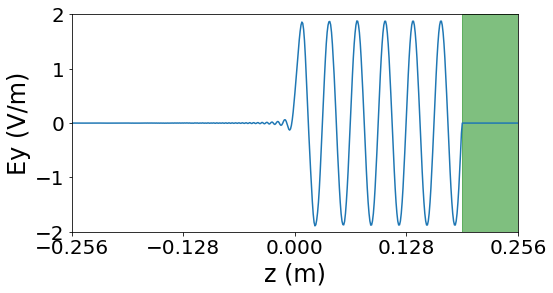

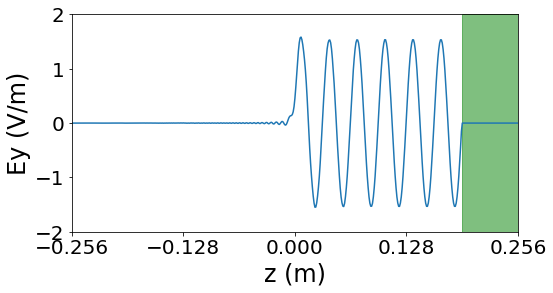

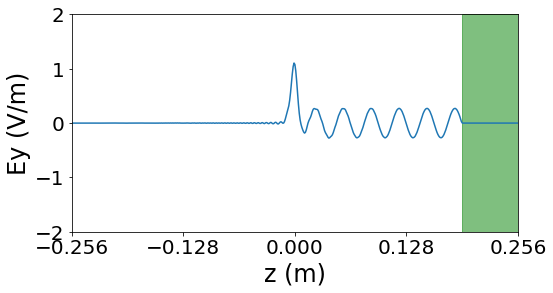

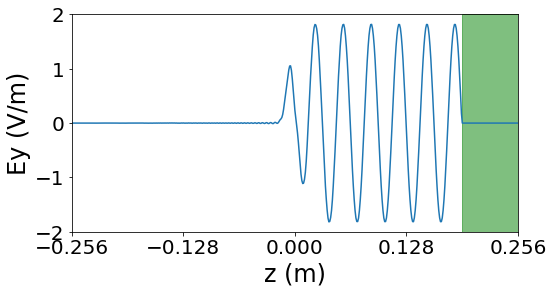

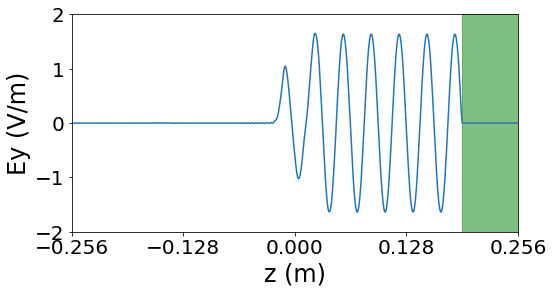

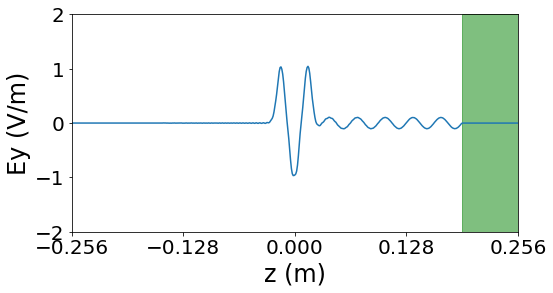

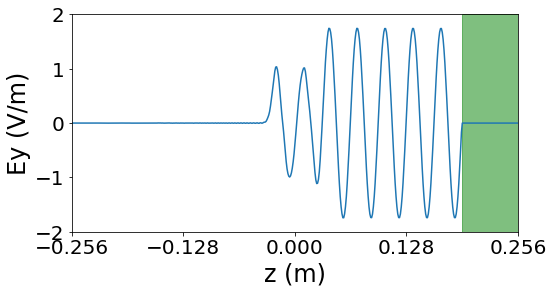

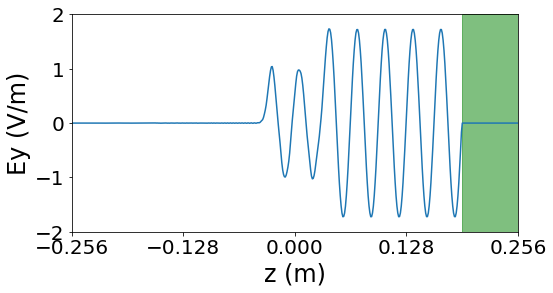

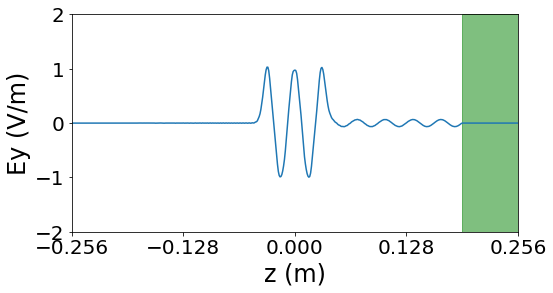

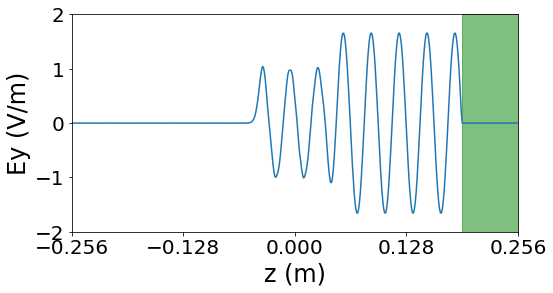

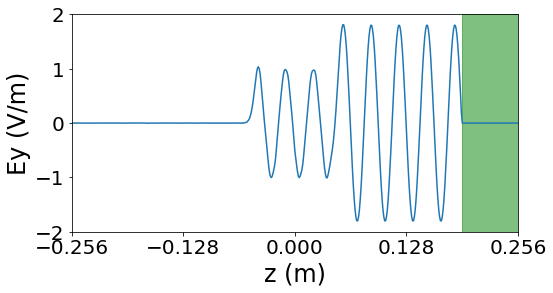

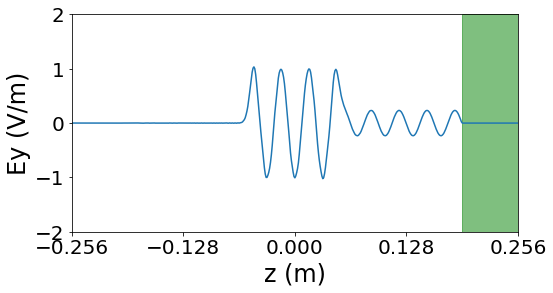

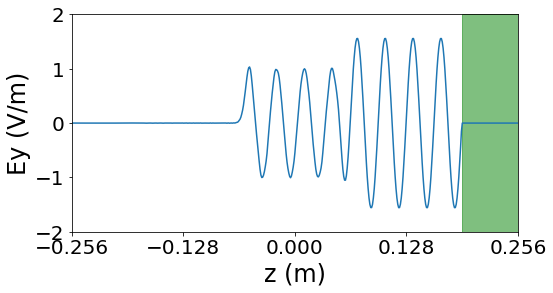

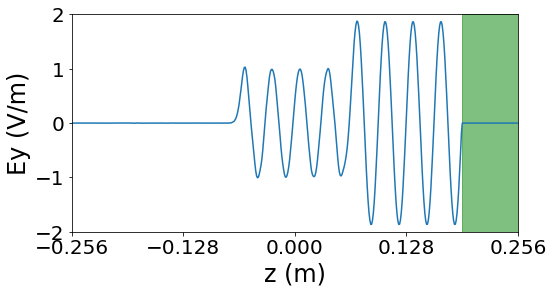

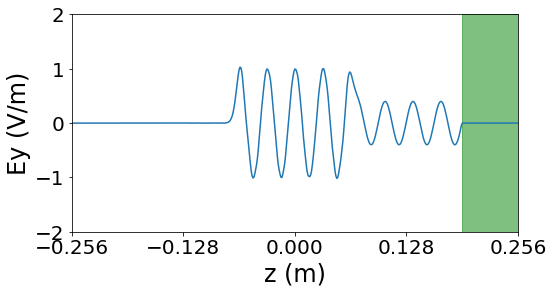

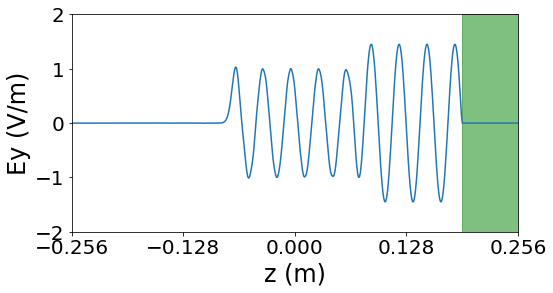

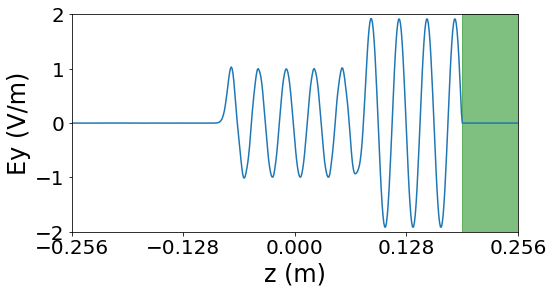

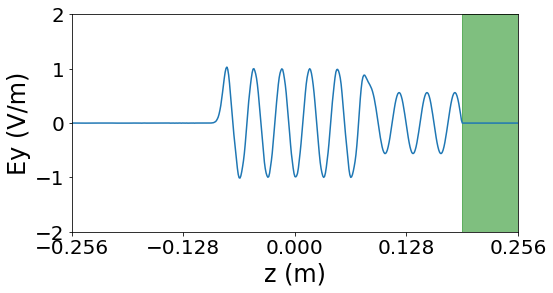

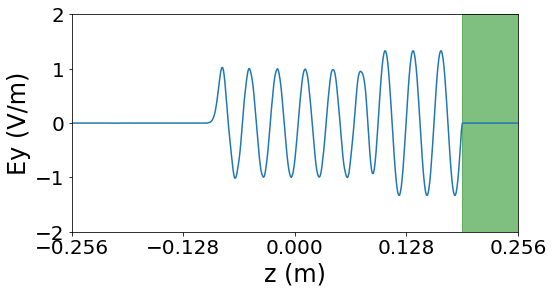

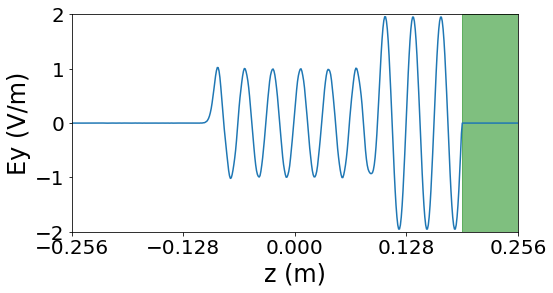

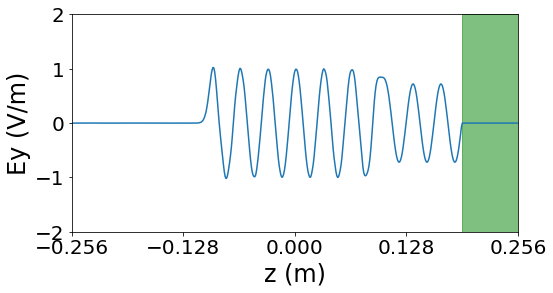

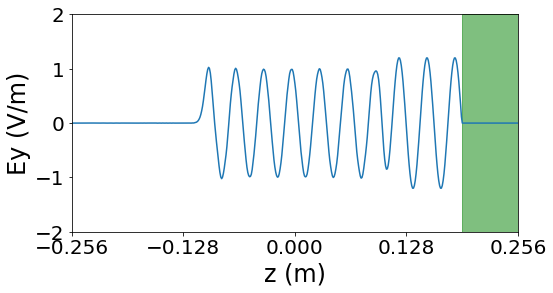

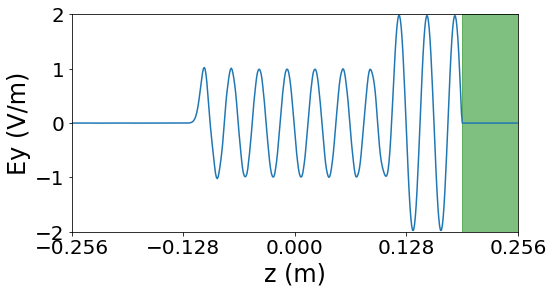

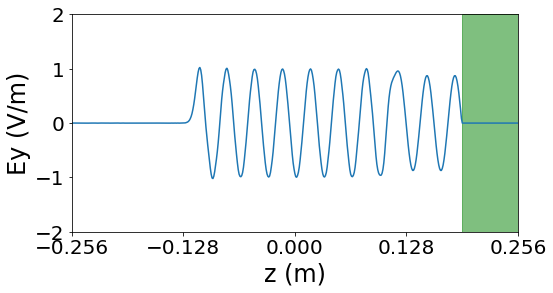

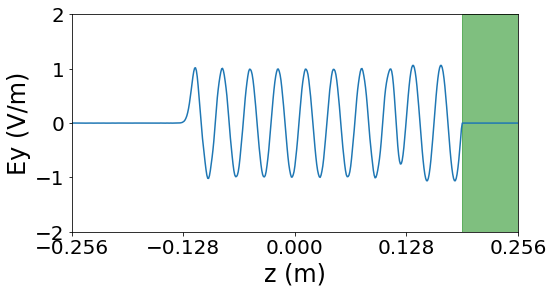

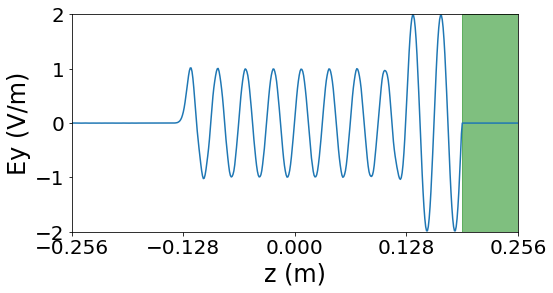

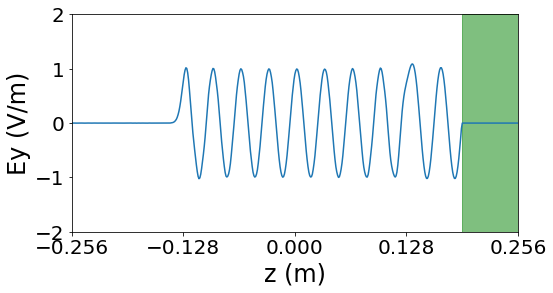

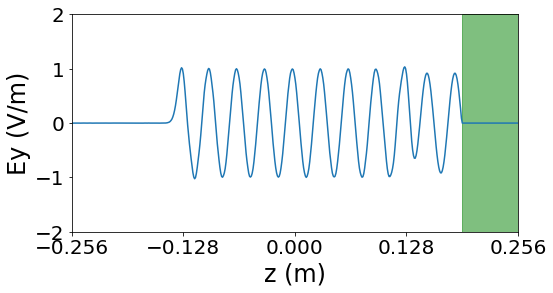

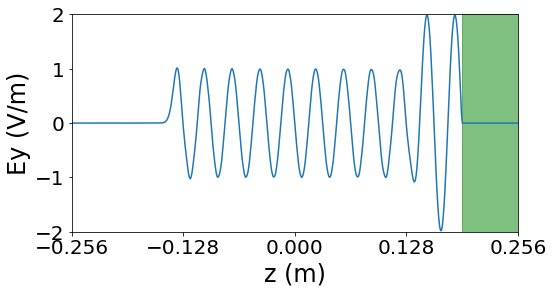

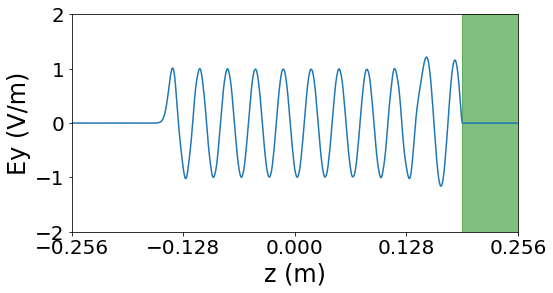

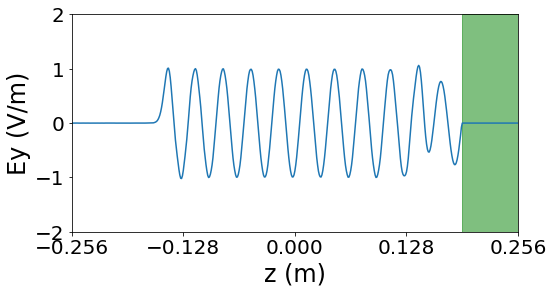

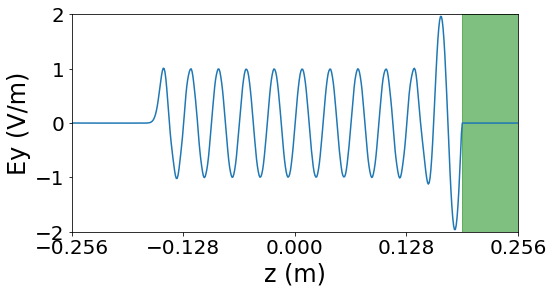

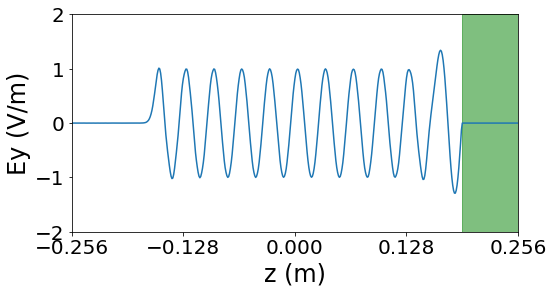

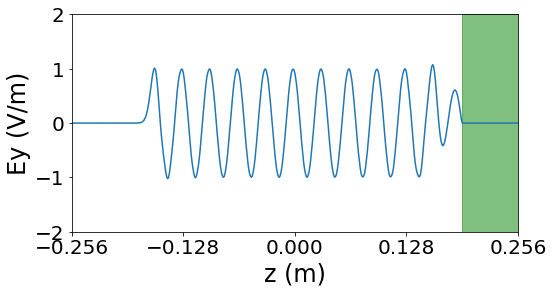

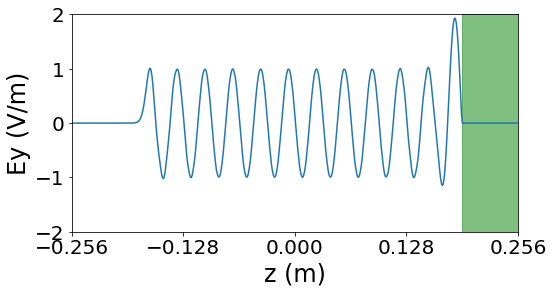

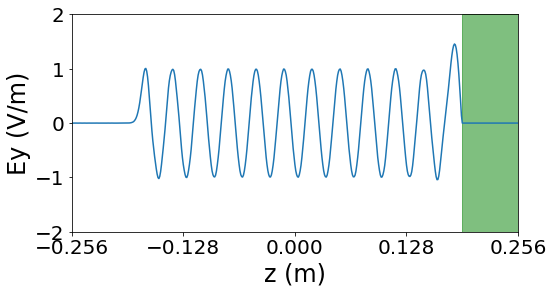

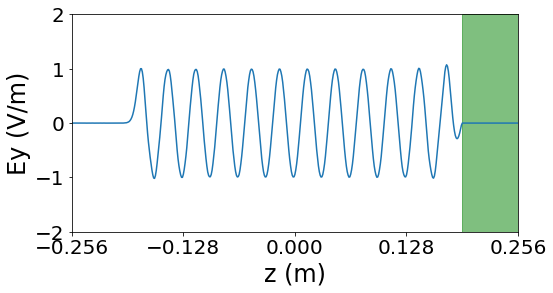

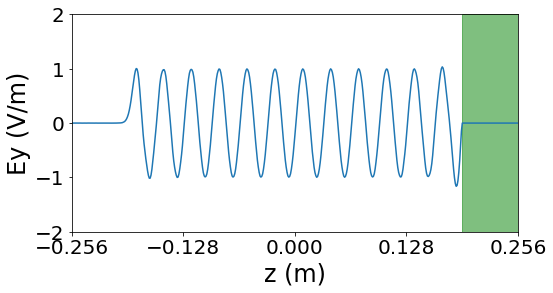

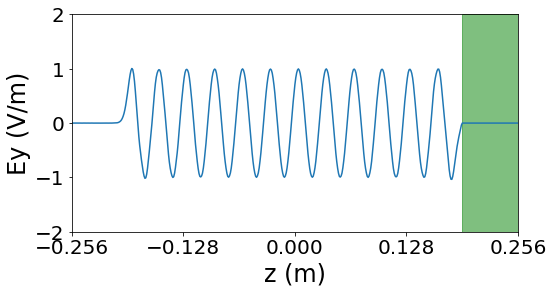

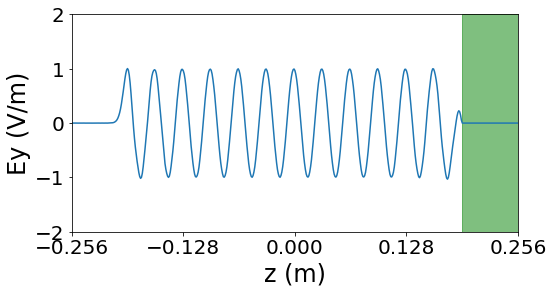

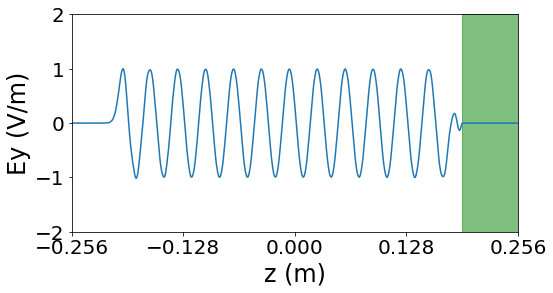

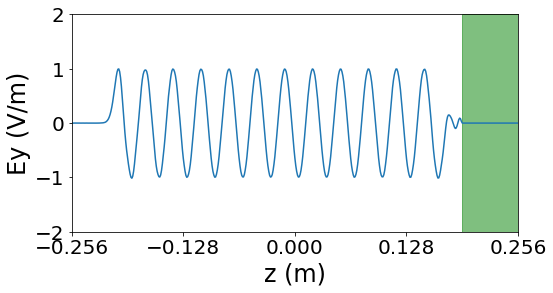

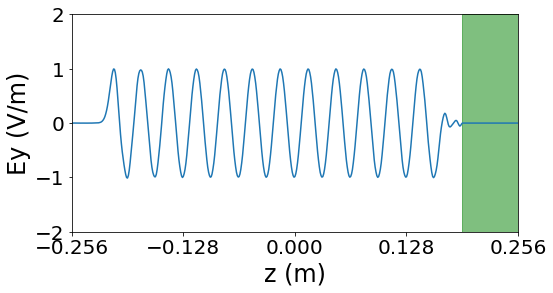

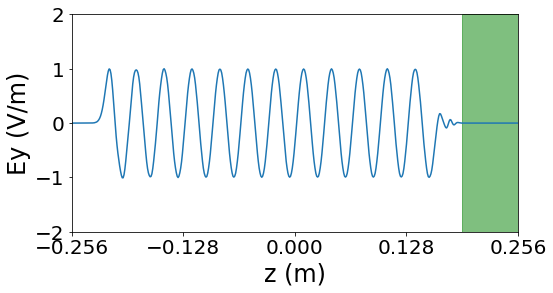

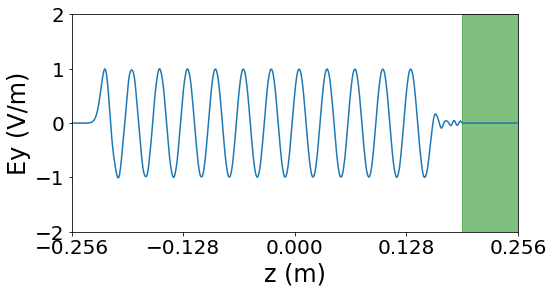

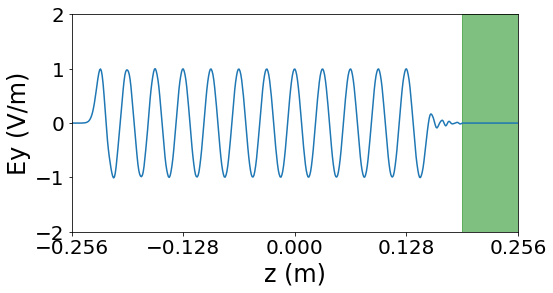

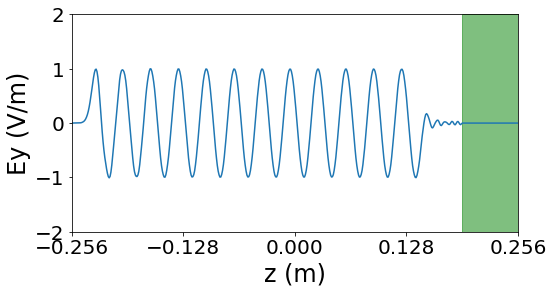

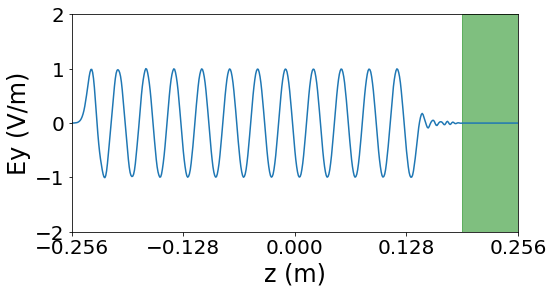

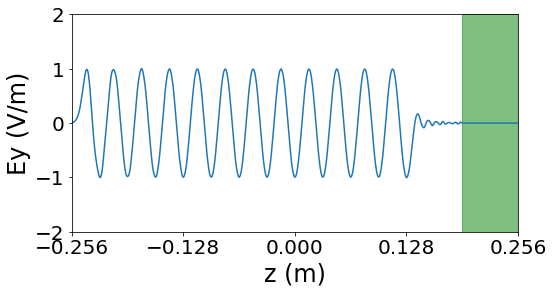

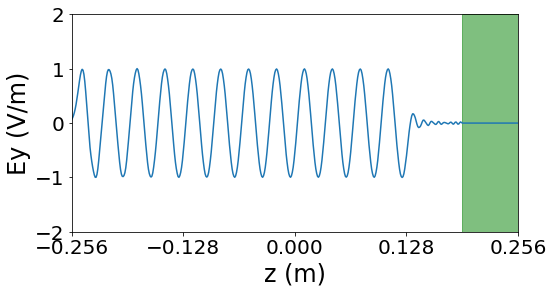

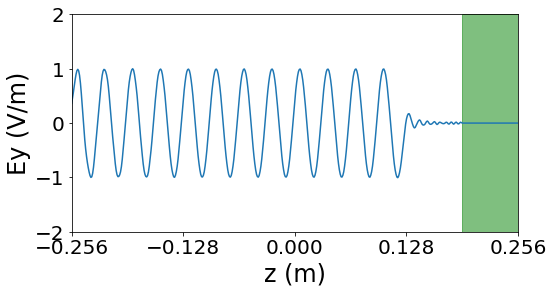

In [1]:
# Import statements
from platform import python_version
print(python_version())
import yt ; 
yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
import math
import cmath
import os
#%matplotlib notebook
iteration = 0
dt_iter = 10
while iteration < 1000 :
    ds = yt.load( './diags_PEC/diag1'+str(iteration).zfill(5) ) # Create a dataset object\n",
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    xCell = ds.domain_dimensions[0]
    yCell = ds.domain_dimensions[1]
    zCell = ds.domain_dimensions[2]
    z_array = ad0['z'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    plt.figure(figsize=(8,4))
    plt.plot(z_array[int(xCell/2),int(yCell/2),:]-z_array[int(xCell/2),int(yCell/2),int(zCell/2)],Ey_array[int(xCell/2),int(yCell/2),:])
    plt.ylim(-2, 2)
    plt.xlim(-256e-3, 256.000001e-3)
    plt.xticks(np.arange(-256.e-3, 256.000001e-3, step=128.e-3))
    plt.xlabel('z (m)')
    plt.ylabel('Ey (V/m)')
    max_Ey = max(Ey_array[int(xCell/2), int(yCell/2), int(zCell/2):zCell])
    print(max_Ey)
    plt.axvspan(192.e-3, 256.e-3, color='green', alpha=0.5)
    plt.savefig(str(iteration).zfill(5)+'.png',bbox_inches = "tight")
    iteration = iteration + dt_iter
    
wavelength = 32.e-3
mu0 = 4*math.pi*1.e-7
epsilon0 = 8.86e-12
c0 = 1/math.sqrt(mu0*epsilon0)
omega = 2*math.pi*c0/wavelength
sigma = 5e5 # conductivity of media
gamma = 1j*omega*math.sqrt(mu0*epsilon0)*cmath.sqrt(1-1j*sigma/omega/epsilon0)
eta = 1j*omega*mu0/gamma # intrinsic impedance of media
c = 1/cmath.sqrt(mu0*(epsilon0-1j*sigma/omega)) #speed of light in media
dt = 1.225592745e-12
#z_obs = 128e-3
#nt = z_obs/c0/dt
nt = 250
z_obs = nt*dt*np.real(c)
z_obs = 0.1
print("speed of light in vacuum", c0)
print("speed of light in media", c)
print("frequency = ", omega/2/math.pi)
print("propagation const = ", gamma)
print("intrinsic impedance = ", eta)
print("tranmission coef = ", 2*eta/(eta+120*math.pi))
print("reflection coef =", (eta-120*math.pi)/(eta+120*math.pi))
print("observation time point", nt)
print("observation point z =", z_obs)
print("attenuation term = ", math.exp(-np.real(gamma)*z_obs))